<a href="https://colab.research.google.com/github/Uz8351/MyPhython/blob/master/Copia_de_DescenGradienAdan_Aula_B_228_OCT_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

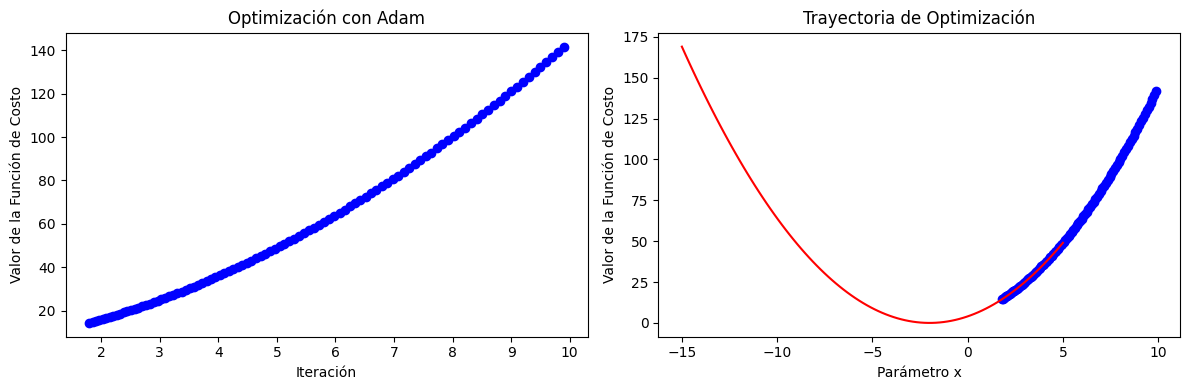

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Función de costo que queremos minimizar (simple para propósitos de demostración)
def cost_function(x):
    return x**2 + 4 * x + 4

# Derivada de la función de costo
def gradient(x):
    return 2 * x + 4

# Inicialización de parámetros
learning_rate = 0.1
beta1 = 0.9
beta2 = 0.999
epsilon = 1e-8
max_iterations = 100

# Inicialización de variables para el algoritmo Adam
m = 0  # Promedio móvil exponencial de los gradientes
v = 0  # Promedio móvil exponencial de los gradientes al cuadrado
t = 0  # Contador de iteraciones

# Listas para almacenar los valores de x y la función de costo en cada iteración
x_values = []
cost_values = []

# Valor inicial de x
x = 10

for t in range(1, max_iterations + 1):
    # Calcula el gradiente de la función de costo en x
    g = gradient(x)

    # Actualiza el promedio móvil exponencial de los gradientes (m)
    m = beta1 * m + (1 - beta1) * g

    # Actualiza el promedio móvil exponencial de los gradientes al cuadrado (v)
    v = beta2 * v + (1 - beta2) * (g**2)

    # Corrige los sesgos en m y v
    m_hat = m / (1 - beta1**t)
    v_hat = v / (1 - beta2**t)

    # Actualiza el valor de x utilizando Adam
    x -= learning_rate * m_hat / (np.sqrt(v_hat) + epsilon)

    # Almacena los valores de x y la función de costo en cada iteración
    x_values.append(x)
    cost_values.append(cost_function(x))

# Gráfica de la función de costo
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(x_values, cost_values, marker='o', color='b')
plt.title('Optimización con Adam')
plt.xlabel('Iteración')
plt.ylabel('Valor de la Función de Costo')

# Gráfica de la trayectoria de optimización en el espacio de parámetros
plt.subplot(1, 2, 2)
x_range = np.linspace(-15, 5, 100)
y_range = cost_function(x_range)
plt.plot(x_range, y_range, color='r')
plt.scatter(x_values, cost_values, color='b', marker='o')
plt.title('Trayectoria de Optimización')
plt.xlabel('Parámetro x')
plt.ylabel('Valor de la Función de Costo')
plt.tight_layout()

plt.show()
